In [2]:
from PIL import Image

In [3]:
imOne = Image.open('band1.gif')
imTwo = Image.open('band2.gif')
imThree = Image.open('band3.gif')
imFour = Image.open('band4.gif')

In [4]:
import numpy as np

In [5]:
arrOne = np.asarray(imOne)
arrTwo = np.asarray(imTwo)
arrThree = np.asarray(imThree)
arrFour = np.asarray(imFour)
data = np.dstack([imOne, imTwo, imThree, imFour])

In [6]:
#river dimensions
values = []
file = open('river.txt', "r")
for line in file:
    values.append([int(n) for n in line.split(',')])
    

river_sample = []
for j in range(len(values)):
    d = [x for x in data[values[j][0]][values[j][1]]]
    d.append(0)
    
    river_sample.append(d)

river_sample = np.array(river_sample)


In [7]:
#land dimensions
values = []
file = open('land.txt', "r")
for line in file:
    values.append([int(n) for n in line.split(',')])

land_sample = []
for j in range(len(values)):
    d = [x for x in data[values[j][0]][values[j][1]]]
    d.append(1)
    land_sample.append(d)

land_sample = np.array(land_sample)

In [8]:
import math

In [9]:
def distance(a, b):
    """ This function will return euclidean disatance between two points"""
    return math.sqrt((a[0]-b[0])*(a[0]-b[0]) + (a[1] - b[1])*(a[1]-b[1]) + (a[2] - b[2])*(a[2]-b[2]) + (a[3] - b[3])*(a[3]-b[3]))

In [10]:
distance(data[0][0], land_sample[0])

10.246950765959598

In [11]:
data[0]

array([[ 9, 11, 12, 28],
       [ 9, 11, 15, 27],
       [ 6,  9, 12, 26],
       ..., 
       [ 9, 11, 13, 18],
       [ 9, 12, 13, 19],
       [ 9, 12, 14, 19]], dtype=uint8)

In [73]:
k = 5
neighbours = [[1000000.0, 0]]
neighbours = neighbours * k
neighbours[0] = [100000.0, 0]
#print(len(neighbours))
dist = 0.0
for i in range(len(land_sample)):
    #print(i)
    dist = distance(data[0][0], land_sample[i])
    d = [dist, 1]
    l = 0
    #print(neighbours[l][0], dist)
    while dist > neighbours[l][0] and l<k-1:
        l = l+1
        
    while (l < k-1):
        x = neighbours[l]
        neighbours[l] = d
        d = x
        l = l+1
        #neighbours[l] = x
        #print(l)
    if(l < k and neighbours[l][0] > d[0] ):
        neighbours[l] = d
    
    print(neighbours)

for i in range(len(river_sample)):
    dist = distance(data[0][0], river_sample[i])
    d = [dist, 1]
    l = 0
    while dist > neighbours[l][0] and l<k-1:
        l = l+1
        
    while (l < k-1):
        x = neighbours[l]
        neighbours[l] = d
        d = x
        l = l+1
    if(l < k and neighbours[l][0] > d[0] ):
        neighbours[l] = d

[[10.246950765959598, 1], [100000.0, 0], [1000000.0, 0], [1000000.0, 0], [1000000.0, 0]]
[[8.48528137423857, 1], [10.246950765959598, 1], [100000.0, 0], [1000000.0, 0], [1000000.0, 0]]
[[8.48528137423857, 1], [9.055385138137417, 1], [10.246950765959598, 1], [100000.0, 0], [1000000.0, 0]]
[[8.48528137423857, 1], [9.0, 1], [9.055385138137417, 1], [10.246950765959598, 1], [100000.0, 0]]
[[6.164414002968976, 1], [8.48528137423857, 1], [9.0, 1], [9.055385138137417, 1], [10.246950765959598, 1]]
[[6.164414002968976, 1], [7.0710678118654755, 1], [8.48528137423857, 1], [9.0, 1], [9.055385138137417, 1]]
[[6.164414002968976, 1], [7.0710678118654755, 1], [8.48528137423857, 1], [8.48528137423857, 1], [9.0, 1]]
[[6.164414002968976, 1], [7.0710678118654755, 1], [8.48528137423857, 1], [8.48528137423857, 1], [8.48528137423857, 1]]
[[6.164414002968976, 1], [7.0710678118654755, 1], [8.48528137423857, 1], [8.48528137423857, 1], [8.48528137423857, 1]]
[[3.605551275463989, 1], [6.164414002968976, 1], [7.071

In [85]:
img = np.zeros((512, 512))
k = 5
for m in range(len(data)):
    for n in range(len(data)):
        neighbours = [[1000000.0, 0]]
        neighbours = neighbours * k
        neighbours[0] = [100000.0, 0]
        dist = 0.0
        for i in range(len(land_sample)):
            dist = distance(data[m][n], land_sample[i])
            d = [dist, 1]
            l = 0
            while dist > neighbours[l][0] and l<k-1:
                l = l+1
            while (l < k-1):
                x = neighbours[l]
                neighbours[l] = d
                d = x
                l = l+1
            if(l < k and neighbours[l][0] > d[0] ):
                neighbours[l] = d
        for i in range(len(river_sample)):
            dist = distance(data[m][n], river_sample[i])
            d = [dist, 1]
            l = 0
            while dist > neighbours[l][0] and l<k-1:
                l = l+1
            while (l < k-1):
                x = neighbours[l]
                neighbours[l] = d
                d = x
                l = l+1
            if(l < k and neighbours[l][0] > d[0] ):
                neighbours[l] = d
        ones = 0
        zeroes = 0
        for i in range(k):
            ones = ones + neighbours[i][0] 
            zeroes = k - ones
        if(ones > zeroes):
            img[m][n] = 1

In [79]:
import matplotlib
%matplotlib inline

In [81]:
import matplotlib.pyplot as plt

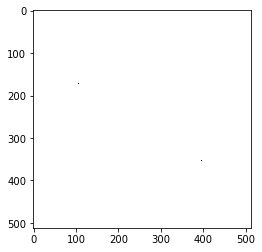

In [86]:
class Formatter(object):
    def __init__(self, im):
        self.im = im
    def __call__(self, x, y):
        z = self.im.get_array()[int(y), int(x)]
        return 'x={:.01f}, y={:.01f}, z={:.01f}'.format(x, y, z)

#data = np.random.random((10,10))

fig, ax = plt.subplots()
im = ax.imshow(img, interpolation='none', cmap='gray')
ax.format_coord = Formatter(im)
plt.show()

In [87]:
img

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])